<a href="https://colab.research.google.com/github/Hitoshi-Nakanishi/Recommendation/blob/master/002_ablation_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook", font_scale=1.5)

/Users/hitoshinakanishi/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
with open('gs.pickle', 'rb') as f:
    gs = pickle.load(f)

def get_result_df(gs):
    params = pd.DataFrame(gs.cv_results_['params'])
    mean_test = pd.Series(gs.cv_results_['mean_test_score']).to_frame('mean_test_score')
    std_test_score = pd.Series(gs.cv_results_['std_test_score']).to_frame('std_test_score')
    rank_test_score = pd.Series(gs.cv_results_['rank_test_score']).to_frame('rank_test_score')    
    result_df = params.join(mean_test).join(std_test_score).join(rank_test_score)
    return result_df

result_df = get_result_df(gs)

# top 10 / bot 10 sorted by averaged test score

In [ ]:
result_df.sort_values('rank_test_score', ascending=False).head(10)

,dim_D,lambda_,sigma2,mean_test_score,std_test_score,rank_test_score
3,2,1.0,1.0,1.073417,0.016199,24
4,2,1.0,2.0,1.097108,0.019576,23
2,2,1.0,0.5,1.115078,0.035726,22
5,2,1.0,4.0,1.211123,0.015629,21
1,2,1.0,0.1,1.245248,0.008237,20
11,5,1.0,4.0,1.288207,0.019122,19
10,5,1.0,2.0,1.347574,0.002930,18
9,5,1.0,1.0,1.374702,0.044306,17
17,10,1.0,4.0,1.404766,0.027450,16
23,15,1.0,4.0,1.417557,0.009337,15


In [ ]:
result_df.sort_values('rank_test_score', ascending=False).tail(10)

,dim_D,lambda_,sigma2,mean_test_score,std_test_score,rank_test_score
7,5,1.0,0.10,1.727687,0.061568,10
15,10,1.0,1.00,1.745708,0.053451,9
21,15,1.0,1.00,1.778350,0.031914,8
14,10,1.0,0.50,1.872668,0.027931,7
20,15,1.0,0.50,2.045653,0.083662,6
13,10,1.0,0.10,2.369973,0.096118,5
19,15,1.0,0.10,2.797615,0.154216,4
6,5,1.0,0.01,3.168506,1.002437,3
12,10,1.0,0.01,3.824862,0.224304,2
18,15,1.0,0.01,4.852644,0.304839,1


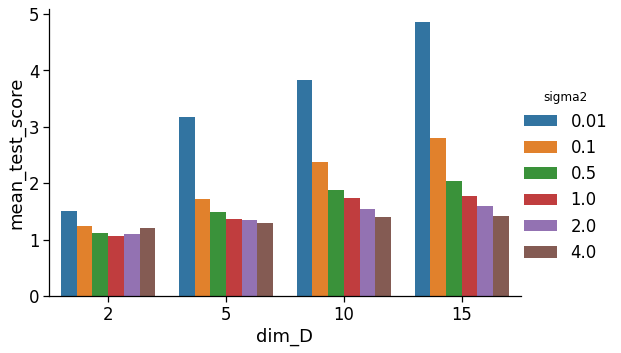

In [ ]:
ax = sns.catplot(data=result_df, x="dim_D", y="mean_test_score", hue='sigma2', kind='bar', aspect=1.5)

# Result

the best hyperparameters of PMF model for super-small movieLens datasets seems to be

- the factor of regularization term $\lambda \sigma^2 = 1$ 
- the feature space dimension $D = \text{dim(U's col)} = 2$

# Discussion
This result is suprising for me, and I iamgined large feature space should have better test score at first.

### Is iteration enough for large feature dimension update? - Yes, it is
In grid search cross validation, I used 10 iterations to update $q(U)$ and $q(V)$
In next jupyter notebook, I verified iteration size is enough even if the feature dimension is 10 or 15